In [36]:
import numpy as np
import pandas as pd
movie = pd.read_csv('movies.csv')
movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [37]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# Feature Engineering

In [38]:
movieClean = pd.DataFrame(movie.dropna(subset=['gross', 'budget'])) #dropping NUll values in gross and budget as these 2 columns will be used to calculate profit
movieClean.reset_index(drop=True,inplace = True) #reset the index so the data are indexed from 0 to 5436

In [39]:
movieClean['profit'] = movieClean['gross'] - movieClean['budget'] #creating new column profit

In [40]:
movieClean['profitPercentage'] = movieClean['profit']/movieClean['budget']*100 #creating profitPercentage to have a better comparison of the amount of profit earmed each movie

In [41]:
movieClean

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,profitPercentage
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0,147.361958
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0,1207.846800
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0,2890.972594
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0,2284.386829
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0,564.105733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,336505244.0,373.894716
5432,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,234715683.0,276.136098
5433,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,70487753.0,40.278716
5434,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,-23894503.0,-17.699632


In [42]:
# calculate IQR for profitPercentage
Q1 = movieClean['profitPercentage'].quantile(0.25)
Q3 = movieClean['profitPercentage'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

# identify outliers
threshold = 1.5
newMovie = movieClean[~((movieClean['profitPercentage'] < Q1 - 1.5 * IQR) | (movieClean['profitPercentage'] > Q3 + 1.5 * IQR))]
newMovie.reset_index(drop=True,inplace = True)
newMovie.info()

-27.677107428571425
267.13631066666665
294.8134180952381
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4998 non-null   object 
 1   rating            4989 non-null   object 
 2   genre             4998 non-null   object 
 3   year              4998 non-null   int64  
 4   released          4998 non-null   object 
 5   score             4998 non-null   float64
 6   votes             4998 non-null   float64
 7   director          4998 non-null   object 
 8   writer            4998 non-null   object 
 9   star              4998 non-null   object 
 10  country           4997 non-null   object 
 11  budget            4998 non-null   float64
 12  gross             4998 non-null   float64
 13  company           4997 non-null   object 
 14  runtime           4997 non-null   float64
 15  profit            4998 non-null 

# EDA : Selection of features

In [43]:
movieDfNum = pd.DataFrame(newMovie[['budget','profit','runtime']]) #analysing how the two numerical varaible are related to profit
movieDfNum.corr()

,budget,profit,runtime
budget,1.000000,0.689757,0.313786
profit,0.689757,1.000000,0.232576
runtime,0.313786,0.232576,1.000000


***We can see that runtime and profit does not have high correlation, this means that runtime does not really affect profit of movie while budget are more correlated to profit, hence budget will be a better variable to consider***

In [44]:
interested_col = ['genre','director','writer','star','company']
for column in interested_col:                    #loop through categorical variable that we are interested
    print("Unique values in ",column,":")
    print(newMovie[column].nunique())
    print()                                      #determining which categorical varaible we can use          

Unique values in  genre :
15

Unique values in  director :
1981

Unique values in  writer :
3056

Unique values in  star :
1715

Unique values in  company :
1371



***We cannot simply use categorical variables like 'writer','star','director' in our model as there are too many unique values for each category. One-hot encoding is needed to convert each unqiue values in each category into a numeric value, with over a thousand unique categories for a single variable may not be practical in most cases due to the curse of dimensionality. One-hot encoding will create more than a thousand new binary columns, resulting in a very wide dataset. This will lead to computational inefficiency, increased memory usage, and potential overfitting. Hence genre is the only suitable variable we may use for now***

# EDA : Visualization of selected variables

In [45]:
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics 

<Axes: xlabel='profitPercentage', ylabel='genre'>

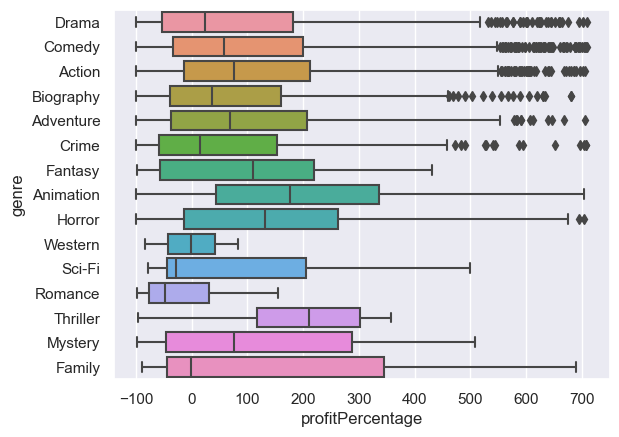

In [46]:
sb.boxplot(data = newMovie, x = 'profitPercentage', y='genre', orient = "h")

***From the plots above, genre indeed affects the profit of the movie***

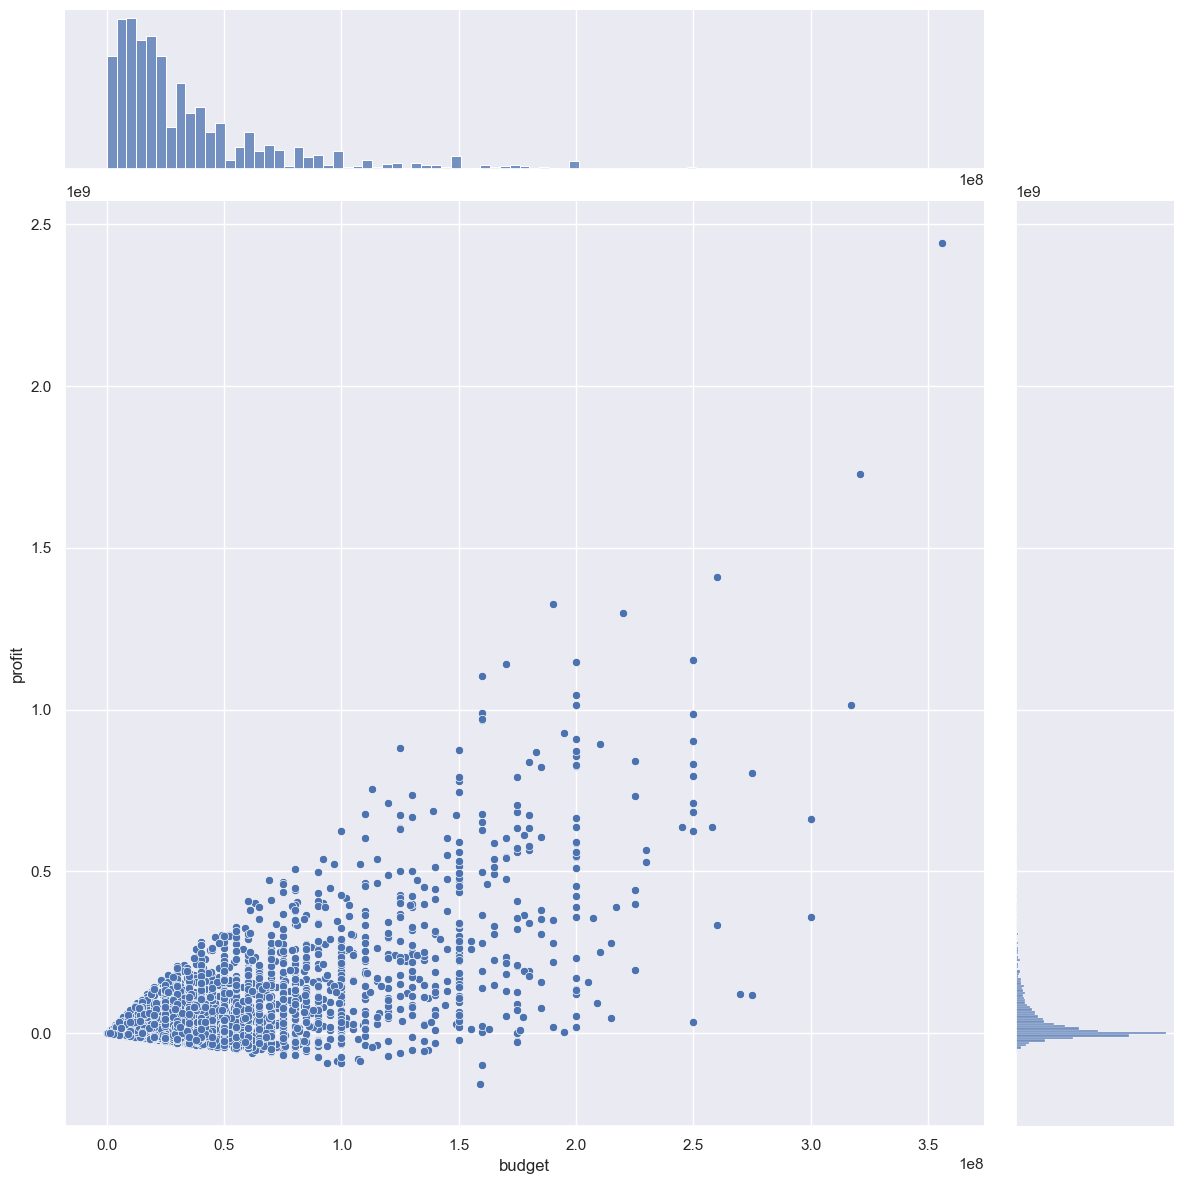

In [47]:
sb.jointplot(data = newMovie, x = "budget", y = "profit", height = 12) #visualizing budget with profit 

***Checking other possible variables***

In [48]:
# Movies in production in each year
print(newMovie["year"].value_counts())

year
2002    166
2009    163
2008    160
2005    158
2000    156
1999    155
2001    154
2006    153
2010    153
2007    150
2003    149
2012    147
2004    147
1998    144
2013    144
2011    143
2014    142
1997    142
2016    142
2015    138
1996    137
1993    136
1995    130
2018    123
1992    121
1988    121
1994    119
2017    118
1991    107
1989    104
1990    101
2019     99
1987     94
1986     93
1985     88
1983     74
1984     70
1982     65
1981     52
1980     33
2020      7
Name: count, dtype: int64


<Axes: xlabel='profitPercentage', ylabel='year'>

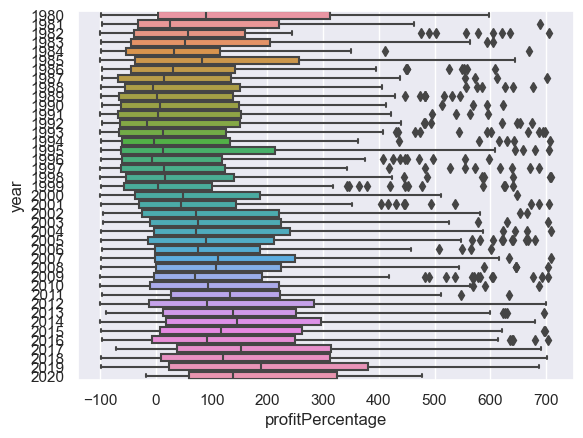

In [71]:
sb.boxplot(data = newMovie, x = 'profitPercentage', y='year', orient = "h")

In [72]:
print(newMovie["country"].value_counts())

country
United States                     3989
United Kingdom                     458
France                              98
Canada                              96
Germany                             80
Australia                           37
China                               24
Hong Kong                           24
Japan                               24
Ireland                             20
Italy                               18
Spain                               15
New Zealand                         14
South Korea                         12
Denmark                             10
Mexico                               7
Czech Republic                       7
India                                6
Sweden                               5
Switzerland                          4
Belgium                              4
South Africa                         4
Brazil                               3
West Germany                         3
Norway                               3
Netherlands      

***Majority of the movie are from United State hence may not be useful to look at country.***

# Model 1 : Uni-variable classification using genre

***We decided to come up with a new variable 'worth' and it has two unique value 1 and 0 where 1 stands for worth to invest and 0 stands for not worth to invest. We will use genre to predict worth.***

In [51]:
ModelOneDf = pd.DataFrame(newMovie[['genre','profitPercentage']])  #creating a new dataframe so the cleaned newMovie dataframe is untouched

profitPercentage = pd.DataFrame(ModelOneDf['profitPercentage'])

# Define a function to apply the condition and return 1 or 0
def categorize_profit(profitPercentage):
    if profitPercentage >= newMovie['profitPercentage'].median(): #We used median to classify so there is same number of '1' and '0' hence no need upsampling/downsampling in the future
        return 1
    else:
        return 0

# Apply the function to create a new column worth
ModelOneDf['worth'] = ModelOneDf['profitPercentage'].apply(categorize_profit)
ModelOneDf

,genre,profitPercentage,worth
0,Drama,147.361958,1
1,Comedy,564.105733,1
2,Action,326.777370,1
3,Biography,30.013483,0
4,Action,100.343900,1
...,...,...,...
4993,Action,373.894716,1
4994,Action,276.136098,1
4995,Adventure,40.278716,0
4996,Adventure,-17.699632,0


In [52]:
from sklearn.preprocessing import OneHotEncoder  #need to encode the categorical values

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Fit the encoder to the genre data and transform it
genre_encoded = encoder.fit_transform(ModelOneDf[['genre']])

# Create a DataFrame with the one-hot encoded genre data
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['genre']))

# Concatenate the encoded genre DataFrame with the original DataFrame
ClassificationDf = pd.concat([ModelOneDf, genre_encoded_df], axis=1)

# Drop the original 'genre' column and 'profitPercentage' column
ClassificationDf.drop(columns=['genre', 'profitPercentage'], inplace=True)

# Now ClassificationDf contains one-hot encoded genre information and other features
ClassificationDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   worth            4998 non-null   int64  
 1   genre_Action     4998 non-null   float64
 2   genre_Adventure  4998 non-null   float64
 3   genre_Animation  4998 non-null   float64
 4   genre_Biography  4998 non-null   float64
 5   genre_Comedy     4998 non-null   float64
 6   genre_Crime      4998 non-null   float64
 7   genre_Drama      4998 non-null   float64
 8   genre_Family     4998 non-null   float64
 9   genre_Fantasy    4998 non-null   float64
 10  genre_Horror     4998 non-null   float64
 11  genre_Mystery    4998 non-null   float64
 12  genre_Romance    4998 non-null   float64
 13  genre_Sci-Fi     4998 non-null   float64
 14  genre_Thriller   4998 non-null   float64
 15  genre_Western    4998 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 624.9 KB


C:\Users\shanshan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
ClassificationDf['worth'].isna().any()  #check that ther are not null value in 'worth' or else will lead to error

False

In [54]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors

y = pd.DataFrame(ClassificationDf['worth'])
X = pd.DataFrame(ClassificationDf.drop(columns=['worth']))#drop worth since only the genres needed as predictors

print(y.shape)
print(X.shape)

(4998, 1)
(4998, 15)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (3748, 1) (3748, 15)
Test Set  : (1250, 1) (1250, 15)


In [56]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier()  # create the decision tree object
dectree.fit(X_train, y_train)       # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5565635005336179

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5272



TPRtes =  0.7250437828371279
TNRtest =  0.36082474226804123
FPRtest =  0.6391752577319587
FNRtest =  0.27495621716287216


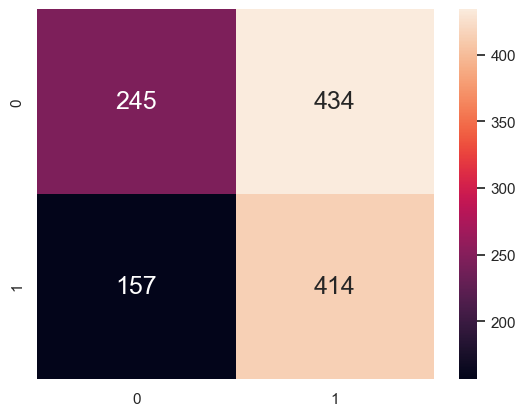

In [57]:
# Plot the two-way Confusion Matrix for test dataset
from sklearn.metrics import confusion_matrix

modelOneTestMat = confusion_matrix(y_test, y_test_pred)
sb.heatmap(modelOneTestMat, annot = True, fmt=".0f", annot_kws={"size": 18})

tn = modelOneTestMat[0,0]
fn = modelOneTestMat[1,0]
tp = modelOneTestMat[1,1]
fp = modelOneTestMat[0,1]
print("TPRtes = ",tp/(tp+fn))
print("TNRtest = ", tn/(tn + fp))
print("FPRtest = ", fp/(tn + fp))
print("FNRtest = ", fn/(tp + fn))


TPRtrain =  0.7655601659751037
TNRtrain =  0.33516483516483514
FPRtrain =  0.6648351648351648
FNRtrain =  0.23443983402489627


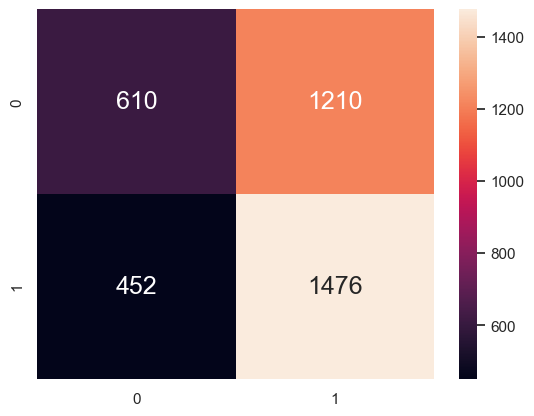

In [58]:
# Plot the two-way Confusion Matrix for train dataset
from sklearn.metrics import confusion_matrix

modelOneTrainMat = confusion_matrix(y_train, y_train_pred)
sb.heatmap(modelOneTrainMat, annot = True, fmt=".0f", annot_kws={"size": 18})
tn = modelOneTrainMat[0,0]
fn = modelOneTrainMat[1,0]
tp = modelOneTrainMat[1,1]
fp = modelOneTrainMat[0,1]
print("TPRtrain = ",tp/(tp+fn))
print("TNRtrain = ", tn/(tn + fp))
print("FPRtrain = ", fp/(tn + fp))
print("FNRtrain = ", fn/(tp + fn))

# Model 2 : Random Forest using genre

***Using random forest to see if we can improve accuracy***

In [59]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Use same Response and Predictors
y = pd.DataFrame(ClassificationDf['worth'])
X = pd.DataFrame(ClassificationDf.drop(columns=['worth']))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [60]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.worth.ravel())

RandomForestClassifier(max_depth=5)

In [61]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)


# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))

Train Data
Accuracy  :	 0.5589647812166488

Test Data
Accuracy  :	 0.5344


TPR Train :	 0.47405405405405404
TNR Train :	 0.6417281348788199

FPR Train :	 0.3582718651211802
FNR Train :	 0.5259459459459459


<Axes: >

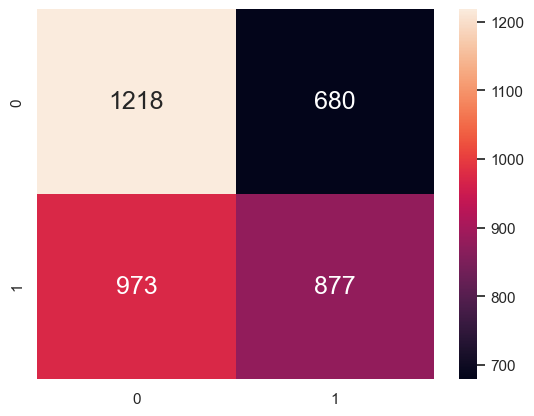

In [62]:
# Print the Accuracy Measures from the Confusion Matrix
ModelTwoTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = ModelTwoTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = ModelTwoTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = ModelTwoTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = ModelTwoTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

TPR Test :	 0.47303543913713403
TNR Test :	 0.6006655574043261

FPR Test :	 0.39933444259567386
FNR Test :	 0.5269645608628659


<Axes: >

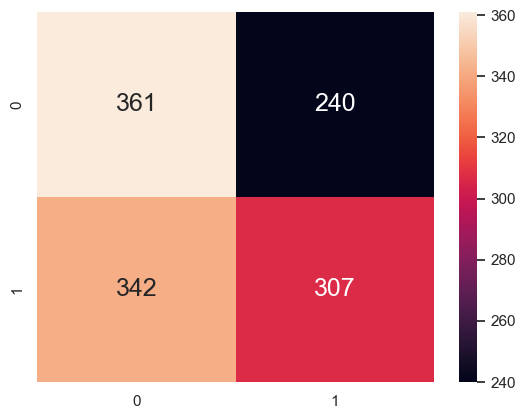

In [63]:
# Print the Accuracy Measures from the Confusion Matrix
ModelTwoTest = confusion_matrix(y_test, y_test_pred)
tpTest = ModelTwoTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = ModelTwoTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = ModelTwoTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = ModelTwoTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Model 3 : Uni-variate classification using budget

***We will use budget to predict worth***

In [64]:
ModelTwoDf = pd.concat([ModelOneDf['worth'],newMovie['budget']], axis=1)
ModelTwoDf.head()

,worth,budget
0,1,19000000.0
1,1,6000000.0
2,1,27000000.0
3,0,18000000.0
4,1,54000000.0


C:\Users\shanshan\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shanshan\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='budget', ylabel='worth'>

C:\Users\shanshan\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shanshan\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


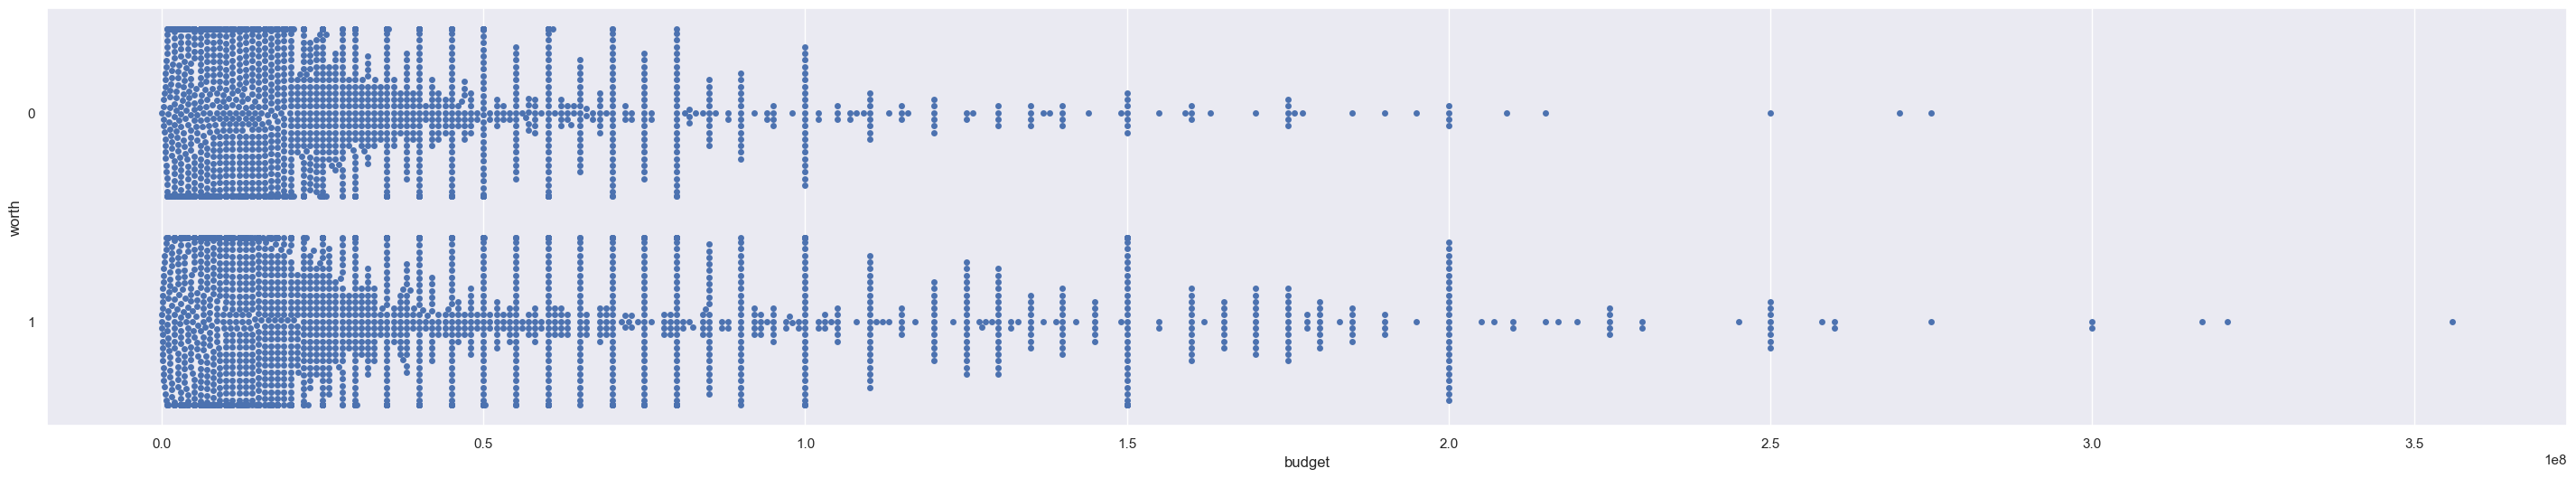

In [65]:
# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(36, 6))
sb.swarmplot(x = "budget", y = "worth", data = ModelTwoDf, orient = "h")

[Text(0.5, 0.875, 'Total <= 68500000.0\ngini = 0.5\nsamples = 3748\nvalue = [1861, 1887]\nclass = Worth'),
 Text(0.25, 0.625, 'Total <= 29875000.0\ngini = 0.498\nsamples = 3150\nvalue = [1681, 1469]\nclass = NotWorth'),
 Text(0.125, 0.375, 'Total <= 475000.0\ngini = 0.493\nsamples = 2175\nvalue = [1217, 958]\nclass = NotWorth'),
 Text(0.0625, 0.125, 'gini = 0.36\nsamples = 17\nvalue = [4, 13]\nclass = Worth'),
 Text(0.1875, 0.125, 'gini = 0.492\nsamples = 2158\nvalue = [1213, 945]\nclass = NotWorth'),
 Text(0.375, 0.375, 'Total <= 35600000.0\ngini = 0.499\nsamples = 975\nvalue = [464, 511]\nclass = Worth'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 330\nvalue = [166, 164]\nclass = NotWorth'),
 Text(0.4375, 0.125, 'gini = 0.497\nsamples = 645\nvalue = [298, 347]\nclass = Worth'),
 Text(0.75, 0.625, 'Total <= 121500000.0\ngini = 0.421\nsamples = 598\nvalue = [180, 418]\nclass = Worth'),
 Text(0.625, 0.375, 'Total <= 69500000.0\ngini = 0.468\nsamples = 380\nvalue = [142, 238]\nclass = W

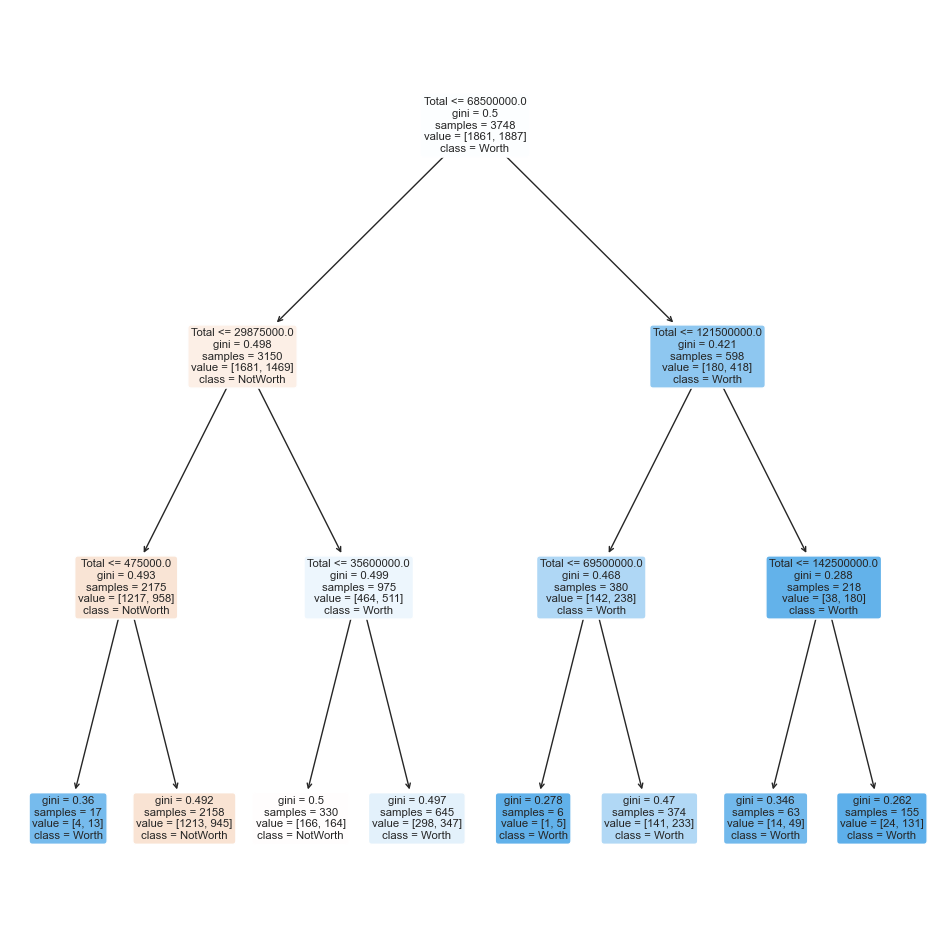

In [66]:
# Recall the Legendary-Total Dataset
y = pd.DataFrame(ModelTwoDf['worth'])   #Response
X = pd.DataFrame(ModelTwoDf['budget']) #Predictor
# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["NotWorth","Worth"])


In [67]:
# Check the Goodness of Fit on Train and Test
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5755069370330843

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5688



TPR train :	 0.4122946475887652
TNR train :	 0.7409994626544868

FPR train :	 0.25900053734551315
FNR train :	 0.5877053524112348


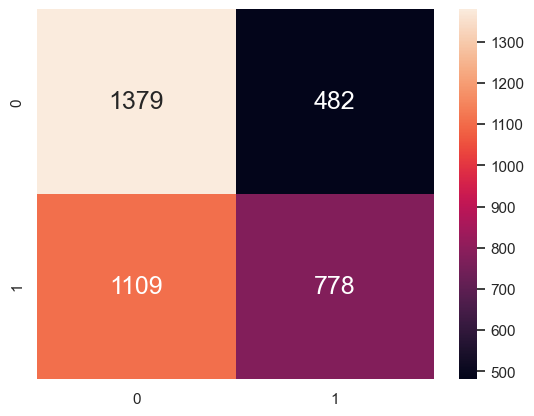

In [68]:
#Plot confusion matrix for train

modelTwoTrainMat = confusion_matrix(y_train, y_train_pred)
sb.heatmap(modelTwoTrainMat, annot = True, fmt=".0f", annot_kws={"size": 18})
tn = modelTwoTrainMat[0,0]
fn = modelTwoTrainMat[1,0]
tp = modelTwoTrainMat[1,1]
fp = modelTwoTrainMat[0,1]
print("TPR train :\t", tp/(tp + fn))
print("TNR train :\t", tn/(tn + fp))
print()

print("FPR train :\t", fp/(fp + tn))
print("FNR train :\t", fn/(fn + tp))

TPR Test :	 0.3888888888888889
TNR Test :	 0.7413793103448276

FPR Test :	 0.25862068965517243
FNR Test :	 0.6111111111111112


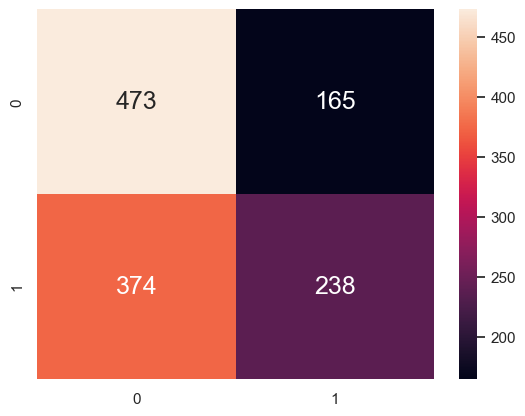

In [69]:
#Plot confusion matrix for Test
modelTwoTestMat = confusion_matrix(y_test, y_test_pred)
sb.heatmap(modelTwoTestMat, annot = True, fmt=".0f", annot_kws={"size": 18})
tn = modelTwoTestMat[0,0]
fn = modelTwoTestMat[1,0]
tp = modelTwoTestMat[1,1]
fp = modelTwoTestMat[0,1]
print("TPR Test :\t", tp/(tp + fn))
print("TNR Test :\t", tn/(tn + fp))
print()

print("FPR Test :\t", fp/(fp + tn))
print("FNR Test :\t", fn/(fn + tp))

***Increasing the depth to see if accuracy increases***

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming ModelTwoDf is your DataFrame containing 'worth' and 'budget' columns

# Define the DataFrame for predictor and response variables
y = pd.DataFrame(ModelTwoDf['worth'])   # Response
X = pd.DataFrame(ModelTwoDf['budget'])  # Predictor

# Split the DataFrame into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize an empty list to store results
results = []

# Loop through different depths from 4 to 10
for depth in range(4, 15):
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth=depth)  # Create the decision tree object
    dectree.fit(X_train, y_train)                     # Train the decision tree model

    # Calculate accuracy scores
    train_accuracy = dectree.score(X_train, y_train)
    test_accuracy = dectree.score(X_test, y_test)
    
    # Append results to the list
    results.append({'Max Depth': depth, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


    Max Depth  Train Accuracy  Test Accuracy
0           4        0.575507         0.5736
1           5        0.576041         0.5736
2           6        0.577641         0.5712
3           7        0.582711         0.5672
4           8        0.583778         0.5664
5           9        0.587780         0.5608
6          10        0.589915         0.5624
7          11        0.591515         0.5552
8          12        0.593917         0.5584
9          13        0.596852         0.5560
10         14        0.600320         0.5512
